In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
#%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set plot and display defaults

In [65]:
sns.set_theme()
#sns.set_palette('colorblind')

- output 1 node
- 256 x 256
- sigmoid activation
- 

In [3]:
import os
for dirname, _, filenames in os.walk('../Data/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Data/train/.DS_Store
../Data/train/PNEUMONIA/BACTERIA-4038442-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-8034950-0011.jpeg
../Data/train/PNEUMONIA/BACTERIA-292199-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-2092977-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-4407438-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-8093423-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-880930-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-3443773-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-9072988-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-9674936-0007.jpeg
../Data/train/PNEUMONIA/VIRUS-1387612-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-778527-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7564600-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-1982399-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-3246536-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-4991468-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-8188709-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-112674-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-3044214-0001.jpeg
../Data/train/PNEUMO

../Data/train/PNEUMONIA/BACTERIA-1083680-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-8034950-0010.jpeg
../Data/train/PNEUMONIA/BACTERIA-2092977-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-8028911-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-9072988-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-880930-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-5476259-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-2474652-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7564600-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-1982399-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-6085366-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-4629598-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6886752-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-5719837-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-3246536-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-4991468-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-397009-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-5602449-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-8188709-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-397479

../Data/train/PNEUMONIA/BACTERIA-1801584-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-1335423-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-8285719-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-254226-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-3408906-0004.jpeg
../Data/train/PNEUMONIA/VIRUS-4805974-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-6823523-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-2442765-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-8200369-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-267057-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6760822-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6839027-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-5100521-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-9237186-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-1041881-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-8797622-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-4802470-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-8871315-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-3956374-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5712388-0001.jpeg
../

../Data/train/PNEUMONIA/VIRUS-2814755-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-9044474-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-284986-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-198200-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-384983-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7172433-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-7823222-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-6340005-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-155541-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-324273-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-6715985-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-3504519-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-5442456-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5611650-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-92115-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-1083680-0008.jpeg
../Data/train/PNEUMONIA/BACTERIA-1844534-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-4061450-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-4092125-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-5091264-0001.jpeg
..

../Data/train/PNEUMONIA/BACTERIA-4469305-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7564600-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-6162954-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-5334028-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-2897609-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-4991468-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-3294243-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-9551241-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-3246536-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-3170240-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-4352107-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-7777605-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5965088-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-2092977-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-8034950-0014.jpeg
../Data/train/PNEUMONIA/VIRUS-3451166-0003.jpeg
../Data/train/PNEUMONIA/VIRUS-5895110-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-2172741-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-5476259-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-9072988-0007.jpe

../Data/train/PNEUMONIA/BACTERIA-3828519-0004.jpeg
../Data/train/PNEUMONIA/VIRUS-537555-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-9044719-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6267582-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5697400-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-9424776-0003.jpeg
../Data/train/PNEUMONIA/VIRUS-2965742-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-564683-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-215369-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6680904-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7267753-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-1630215-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-5628383-0010.jpeg
../Data/train/PNEUMONIA/BACTERIA-4599282-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-4770524-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-2452646-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-5285130-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-8545367-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-2394612-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-8137600-0001.

../Data/train/PNEUMONIA/BACTERIA-2784562-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-6251494-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-4615614-0008.jpeg
../Data/train/PNEUMONIA/VIRUS-512832-0003.jpeg
../Data/train/PNEUMONIA/VIRUS-1114943-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-8360857-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-8166356-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-4892699-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-8324394-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-7478658-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-7630183-0009.jpeg
../Data/train/PNEUMONIA/BACTERIA-990412-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-2410320-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-8313249-0007.jpeg
../Data/train/PNEUMONIA/BACTERIA-3194796-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-9887625-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-9650164-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-385176-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-9543449-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-9582372-0004.jpe

../Data/train/NORMAL/NORMAL-7090700-0001.jpeg
../Data/train/NORMAL/NORMAL-7133593-0001.jpeg
../Data/train/NORMAL/NORMAL-385855-0004.jpeg
../Data/train/NORMAL/NORMAL-5528656-0001.jpeg
../Data/train/NORMAL/NORMAL-926639-0001.jpeg
../Data/train/NORMAL/NORMAL-5387596-0001.jpeg
../Data/train/NORMAL/NORMAL-9422624-0001.jpeg
../Data/train/NORMAL/NORMAL-4019172-0001.jpeg
../Data/train/NORMAL/NORMAL-8027466-0001.jpeg
../Data/train/NORMAL/NORMAL-9462561-0001.jpeg
../Data/train/NORMAL/NORMAL-6524946-0001.jpeg
../Data/train/NORMAL/NORMAL-8349062-0001.jpeg
../Data/train/NORMAL/NORMAL-705219-0002.jpeg
../Data/train/NORMAL/NORMAL-1897360-0001.jpeg
../Data/train/NORMAL/NORMAL-3103404-0002.jpeg
../Data/train/NORMAL/NORMAL-6351934-0001.jpeg
../Data/train/NORMAL/NORMAL-2416577-0002.jpeg
../Data/train/NORMAL/NORMAL-831813-0001.jpeg
../Data/train/NORMAL/NORMAL-8622264-0001.jpeg
../Data/train/NORMAL/NORMAL-6217600-0001.jpeg
../Data/train/NORMAL/NORMAL-9346821-0001.jpeg
../Data/train/NORMAL/NORMAL-2415019-00

../Data/train/NORMAL/NORMAL-2801235-0001.jpeg
../Data/train/NORMAL/NORMAL-2214391-0001.jpeg
../Data/train/NORMAL/NORMAL-2239107-0003.jpeg
../Data/train/NORMAL/NORMAL-3514363-0004.jpeg
../Data/train/NORMAL/NORMAL-1930015-0001.jpeg
../Data/train/NORMAL/NORMAL-4464072-0001.jpeg
../Data/train/NORMAL/NORMAL-9978536-0001.jpeg
../Data/train/NORMAL/NORMAL-9557588-0001.jpeg
../Data/train/NORMAL/NORMAL-6015860-0001.jpeg
../Data/train/NORMAL/NORMAL-6960239-0001.jpeg
../Data/train/NORMAL/NORMAL-3780378-0003.jpeg
../Data/train/NORMAL/NORMAL-6432470-0001.jpeg
../Data/train/NORMAL/NORMAL-1701841-0001.jpeg
../Data/train/NORMAL/NORMAL-9058260-0001.jpeg
../Data/train/NORMAL/NORMAL-1505602-0001.jpeg
../Data/train/NORMAL/NORMAL-7749598-0002.jpeg
../Data/train/NORMAL/NORMAL-5397211-0002.jpeg
../Data/train/NORMAL/NORMAL-4587209-0001.jpeg
../Data/train/NORMAL/NORMAL-6002769-0001.jpeg
../Data/train/NORMAL/NORMAL-385855-0001.jpeg
../Data/train/NORMAL/NORMAL-6153007-0001.jpeg
../Data/train/NORMAL/NORMAL-7298793

In [10]:
pneumonia_filenames = "..Data/train/PNEUMONIA"
normal_filenames = "..Data/train/NORMAL"

## Loading data and file paths

In [4]:
# Setting the paths to the train and validation directories

parent_dir =  os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')
test_dir = os.path.join(parent_dir, 'Data/test')

In [5]:
pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

In [6]:
pneumonia_filenames

['BACTERIA-4038442-0001.jpeg',
 'BACTERIA-8034950-0011.jpeg',
 'BACTERIA-292199-0002.jpeg',
 'BACTERIA-2092977-0003.jpeg',
 'BACTERIA-4407438-0002.jpeg',
 'BACTERIA-8093423-0001.jpeg',
 'BACTERIA-880930-0002.jpeg',
 'VIRUS-3443773-0006.jpeg',
 'BACTERIA-9072988-0002.jpeg',
 'VIRUS-9674936-0007.jpeg',
 'VIRUS-1387612-0002.jpeg',
 'BACTERIA-778527-0001.jpeg',
 'BACTERIA-7564600-0004.jpeg',
 'BACTERIA-1982399-0002.jpeg',
 'BACTERIA-3246536-0004.jpeg',
 'BACTERIA-4991468-0003.jpeg',
 'BACTERIA-8188709-0003.jpeg',
 'BACTERIA-112674-0001.jpeg',
 'BACTERIA-3044214-0001.jpeg',
 'VIRUS-6897628-0002.jpeg',
 'VIRUS-385176-0010.jpeg',
 'BACTERIA-4679582-0001.jpeg',
 'BACTERIA-6162615-0002.jpeg',
 'BACTERIA-1199786-0002.jpeg',
 'BACTERIA-5150733-0007.jpeg',
 'BACTERIA-516591-0002.jpeg',
 'BACTERIA-3582443-0002.jpeg',
 'VIRUS-149498-0002.jpeg',
 'BACTERIA-2792838-0006.jpeg',
 'BACTERIA-6944416-0001.jpeg',
 'BACTERIA-4521338-0003.jpeg',
 'BACTERIA-5401887-0003.jpeg',
 'BACTERIA-1790048-0002.jpeg',
 '

In [7]:
normal_filenames

['NORMAL-2552119-0002.jpeg',
 'NORMAL-7298141-0001.jpeg',
 'NORMAL-3411116-0002.jpeg',
 'NORMAL-1619233-0001.jpeg',
 'NORMAL-7327513-0001.jpeg',
 'NORMAL-2699389-0001.jpeg',
 'NORMAL-3781678-0001.jpeg',
 'NORMAL-8648239-0002.jpeg',
 'NORMAL-5728847-0001.jpeg',
 'NORMAL-6881695-0001.jpeg',
 'NORMAL-8903542-0001.jpeg',
 'NORMAL-715046-0001.jpeg',
 'NORMAL-6084744-0001.jpeg',
 'NORMAL-4994733-0001.jpeg',
 'NORMAL-3853078-0002.jpeg',
 'NORMAL-5264964-0001.jpeg',
 'NORMAL-3573766-0003.jpeg',
 'NORMAL-71482-0001.jpeg',
 'NORMAL-6702380-0001.jpeg',
 'NORMAL-6710847-0001.jpeg',
 'NORMAL-5759621-0001.jpeg',
 'NORMAL-6047821-0001.jpeg',
 'NORMAL-9989984-0001.jpeg',
 'NORMAL-2675017-0001.jpeg',
 'NORMAL-2333546-0001.jpeg',
 'NORMAL-2881863-0001.jpeg',
 'NORMAL-7157255-0001.jpeg',
 'NORMAL-2411226-0001.jpeg',
 'NORMAL-4946392-0001.jpeg',
 'NORMAL-9175762-0002.jpeg',
 'NORMAL-705474-0001.jpeg',
 'NORMAL-28501-0001.jpeg',
 'NORMAL-9000251-0001.jpeg',
 'NORMAL-9816293-0002.jpeg',
 'NORMAL-2559035-000

## Looking at the images

In [8]:
from PIL import Image

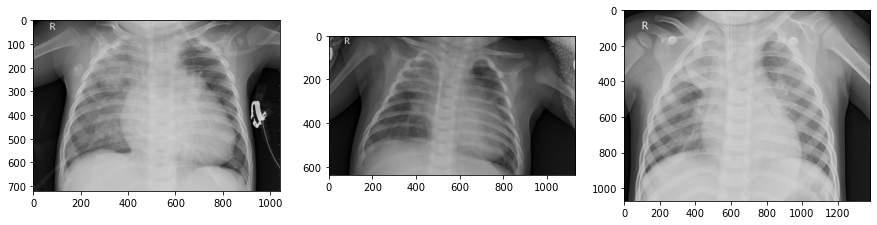

In [9]:
plt.figure(figsize=(15,15))

for i in range(3):
    filename = pneumonia_filenames[i]
    img_addr = train_dir + '/PNEUMONIA/' + filename
    img = Image.open(img_addr)
    # rows, columns, (change the range for # of images)
    ax = plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')

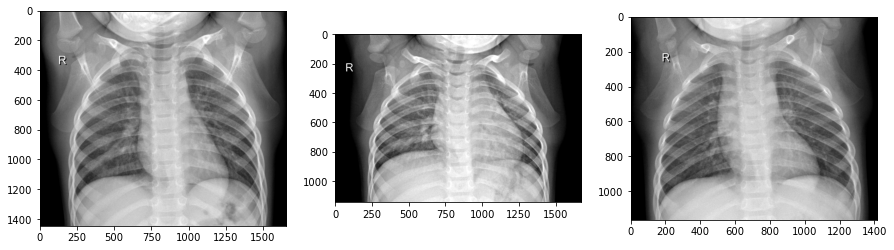

In [10]:
plt.figure(figsize=(15,15))

for i in range(3):
    filename = normal_filenames[i]
    img_addr = train_dir + '/NORMAL/' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

## ImageDataGenerator

In [12]:
## KEEPING THIS ONE
# Defining the image size and batch size
img_size = (128, 128)
batch_size = 32
brightness = [0.8, 1.2]

# Splitting the data into training and validation sets
train_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255, 
                                   brightness_range=brightness, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              color_mode='grayscale',
                                              subset='training',
                                              shuffle=True)

val_generator = train_datagen.flow_from_directory(train_dir,
                                            target_size=img_size,
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            color_mode='grayscale',
                                            subset='validation',
                                            shuffle=True)

Found 4179 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


validation data = validation set when fitting the model

In [20]:
# Setting the paths to the train and test directories
parent_dir = os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')
test_dir = os.path.join(parent_dir, 'Data/test')

# Defining the image size and batch size
img_size = (224, 224)
batch_size = 32

# Getting the list of filenames in the pneumonia and normal folders
pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

# Creating the corresponding labels for the pneumonia and normal images
pneumonia_labels = np.ones(len(pneumonia_filenames))
normal_labels = np.zeros(len(normal_filenames))

# Concatenating the filenames and labels into a single list
filenames = pneumonia_filenames + normal_filenames
labels = np.concatenate([pneumonia_labels, normal_labels])

# Splitting the data into training and validation sets
train_filenames, val_filenames, train_labels, val_labels = train_test_split(filenames, labels, 
                                                                            test_size=0.2, 
                                                                            random_state=42)

# Defining the data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(train_dir,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle=True)


Found 5232 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [27]:
# Setting the paths to the train and test directories
parent_dir = os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')
test_dir = os.path.join(parent_dir, 'Data/test')

# Defining the image size and batch size
img_size = (224, 224)
batch_size = 32

# Getting the list of filenames in the pneumonia and normal folders
pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

# Creating the corresponding labels for the pneumonia and normal images
pneumonia_labels = np.ones(len(pneumonia_filenames))
normal_labels = np.zeros(len(normal_filenames))

# Concatenating the filenames and labels into a single list
filenames = pneumonia_filenames + normal_filenames
labels = np.concatenate([pneumonia_labels, normal_labels])

# Splitting the data into training and validation sets
train_filenames, val_filenames, train_labels, val_labels = train_test_split(filenames, labels, 
                                                                            test_size=0.2, 
                                                                            random_state=42)

In [28]:
len(val_filenames)

1047

In [29]:
len(train_filenames)

4186

In [26]:
# Defining the data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    color_mode='grayscale')


Found 5232 images belonging to 2 classes.


In [ ]:
# Defining the data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(train_dir,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle=True)

# Data Visualization

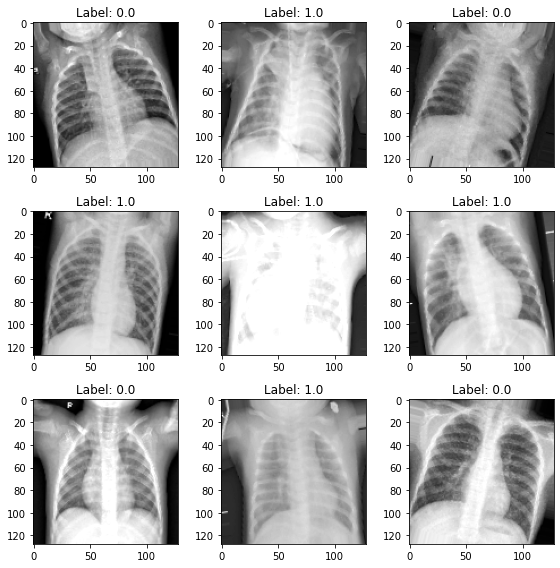

In [13]:
# Plot some sample images from the training data generator
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    img, label = train_generator.next()
    ax.imshow(img[0], cmap='gray')
    ax.set(title=f"Label: {label[0]}")
plt.tight_layout()
plt.show()

In [14]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [15]:
# Extracting the labels from the train_generator
train_labels = train_generator.classes
train_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
# Converting the numeric labels to their corresponding class names
class_names = np.array(['normal', 'pneumonia'])
train_class_names = class_names[train_labels]
train_class_names

array(['normal', 'normal', 'normal', ..., 'pneumonia', 'pneumonia',
       'pneumonia'], dtype='<U9')

''

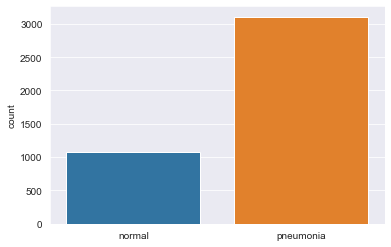

In [18]:
# Plotting the countplot
sns.set_style('darkgrid')
sns.countplot(x=train_class_names)
;

In [24]:
# Get the unique values and their counts
unique, counts = np.unique(train_class_names, return_counts=True)

# Print the counts
for val, count in zip(unique, counts):
    print(f"{val}: {count}")

normal: 1072
pneumonia: 3107


## Initial base model

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
#Gideon's

In [76]:

train_data_dir = train_generator
validation_data_dir = val_generator
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [77]:
val_generator

In [83]:
img_width, img_height = 256, 256

In [84]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [85]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['recall'])

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [ ]:
img_width, img_height = 256, 256

In [116]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

----
Found 4187 images belonging to 2 classes.
----
Found 1045 images belonging to 2 classes.


In [103]:
train_data_dir = train_generator
validation_data_dir = val_generator
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [104]:
img_width, img_height = 256, 256

In [105]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [106]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [107]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['Recall'])

In [108]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10


InvalidArgumentError:  input depth must be evenly divisible by filter depth: 1 vs 3
	 [[node sequential_4/activation_15/Relu (defined at <ipython-input-108-3bb64fd7de71>:1) ]] [Op:__inference_train_function_3582]

Function call stack:
train_function


In [113]:
#Kevin's
model = Sequential(name='Model1')
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
model.fit(train_generator, epochs=8, workers=8, validation_data=val_generator, validation_steps=100//32)

Epoch 1/8


KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
model.save_weights

In [ ]:
#basic

In [ ]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

In [117]:
model = Sequential(name='Model_3')
model.add(Flatten(input_shape=img_size+(1,))) # the "+(1,)" is because our images are grayscale
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])


In [118]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
131/131 [==============================] - 138s 1s/step - loss: 81.5192 - accuracy: 0.6835 - val_loss: 0.6741 - val_accuracy: 0.7416
Epoch 2/10
131/131 [==============================] - 109s 834ms/step - loss: 0.6620 - accuracy: 0.7418 - val_loss: 0.6506 - val_accuracy: 0.7426
Epoch 3/10
131/131 [==============================] - 150s 1s/step - loss: 0.6408 - accuracy: 0.7421 - val_loss: 0.6314 - val_accuracy: 0.7426
Epoch 4/10
131/131 [==============================] - 96s 736ms/step - loss: 3.6402 - accuracy: 0.7375 - val_loss: 0.6171 - val_accuracy: 0.7416
Epoch 5/10
131/131 [==============================] - 88s 668ms/step - loss: 0.6106 - accuracy: 0.7421 - val_loss: 0.6048 - val_accuracy: 0.7426
Epoch 6/10
131/131 [==============================] - 88s 671ms/step - loss: 3.0088 - accuracy: 0.7394 - val_loss: 0.5955 - val_accuracy: 0.7426
Epoch 7/10
131/131 [==============================] - 108s 821ms/step - loss: 0.5922 - accuracy: 0.7421 - val_loss: 0.5886 - val_acc

In [ ]:
#model 2

In [13]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

----
Found 4179 images belonging to 2 classes.
----
Found 1043 images belonging to 2 classes.


In [ ]:
# model 4

In [16]:
# Define the model architecture
model4 = Sequential(name='Model_4')
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))


# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history_4 = model4.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=100//32)

Epoch 1/10
131/131 [==============================] - 126s 959ms/step - loss: 2.4660 - accuracy: 0.8339 - val_loss: 0.1542 - val_accuracy: 0.9479
Epoch 2/10
131/131 [==============================] - 140s 1s/step - loss: 0.1702 - accuracy: 0.9363 - val_loss: 0.2368 - val_accuracy: 0.8958
Epoch 3/10
131/131 [==============================] - 126s 965ms/step - loss: 0.1754 - accuracy: 0.9328 - val_loss: 0.2126 - val_accuracy: 0.9167
Epoch 4/10
131/131 [==============================] - 139s 1s/step - loss: 0.2628 - accuracy: 0.8997 - val_loss: 0.4082 - val_accuracy: 0.8750
Epoch 5/10
131/131 [==============================] - 130s 995ms/step - loss: 0.1395 - accuracy: 0.9478 - val_loss: 0.0475 - val_accuracy: 0.9792
Epoch 6/10
131/131 [==============================] - 133s 1s/step - loss: 0.1192 - accuracy: 0.9541 - val_loss: 0.0491 - val_accuracy: 0.9896
Epoch 7/10
131/131 [==============================] - 131s 1s/step - loss: 0.1097 - accuracy: 0.9603 - val_loss: 0.1246 - val_accurac

In [22]:
model.summary()

Model: "Model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0   

In [ ]:
# model 5

In [ ]:
"""
the pixel values are divided by 255, so they are now in the range [0, 1]. 
This is often done to help with training by making the model more numerically stable. 
It can also improve the performance of the model.
"""

In [34]:
def ImgGen(data_path, img_size=(128,128), batch_size=32, brightness=[0.8, 1.2], vsplit=0.2, rrange=10, seed=2023):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=vsplit, rotation_range=rrange, 
                                       fill_mode='nearest', brightness_range=brightness)
    train_gen = train_datagen.flow_from_directory(data_path, target_size=img_size, batch_size=batch_size, 
                                                  class_mode='binary', color_mode='grayscale', subset='training', 
                                                  shuffle=True, seed=seed)
    val_gen = train_datagen.flow_from_directory(data_path, target_size=img_size, batch_size=batch_size, 
                                                class_mode='binary', color_mode='grayscale', subset='validation', 
                                                shuffle=True, seed=seed)
    return train_gen, val_gen

In [35]:
train_gen5, val_gen5 = ImgGen(train_dir)

Found 4179 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [36]:
# Define the model architecture
model5 = Sequential(name='Model_5')
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))


# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [38]:
results5 = model5.fit(train_gen5, epochs=15, workers=2, validation_data=val_gen1, 
                      validation_steps=100//train_gen5.batch_size)

Epoch 1/15
131/131 [==============================] - 124s 945ms/step - loss: 0.2667 - recall: 0.9527 - val_loss: 0.1235 - val_recall: 0.9437
Epoch 2/15
131/131 [==============================] - 105s 804ms/step - loss: 0.1558 - recall: 0.9649 - val_loss: 0.0467 - val_recall: 0.9859
Epoch 3/15
131/131 [==============================] - 109s 834ms/step - loss: 0.1544 - recall: 0.9601 - val_loss: 0.2938 - val_recall: 0.8939
Epoch 4/15
131/131 [==============================] - 104s 793ms/step - loss: 0.1330 - recall: 0.9652 - val_loss: 0.1037 - val_recall: 1.0000
Epoch 5/15
131/131 [==============================] - 130s 990ms/step - loss: 0.1231 - recall: 0.9681 - val_loss: 0.0630 - val_recall: 0.9841
Epoch 6/15
131/131 [==============================] - 128s 978ms/step - loss: 0.1099 - recall: 0.9730 - val_loss: 0.0871 - val_recall: 0.9853
Epoch 7/15
131/131 [==============================] - 131s 1s/step - loss: 0.1011 - recall: 0.9726 - val_loss: 0.1208 - val_recall: 0.9595
Epoch 8/1

In [26]:
# Train the model
history_5 = model5.fit(train_gen5, epochs=15, validation_data=val_generator, validation_steps=100//32)

Epoch 1/15
131/131 [==============================] - 249s 2s/step - loss: 0.3283 - recall: 0.9627 - val_loss: 0.1347 - val_recall: 0.9714
Epoch 2/15
131/131 [==============================] - 233s 2s/step - loss: 0.1590 - recall: 0.9623 - val_loss: 0.1033 - val_recall: 1.0000
Epoch 3/15
 14/131 [==>...........................] - ETA: 5:03 - loss: 0.1216 - recall: 0.9756

KeyboardInterrupt: 

In [63]:
model5.summary()

Model: "Model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0   

In [ ]:
model5.summary()

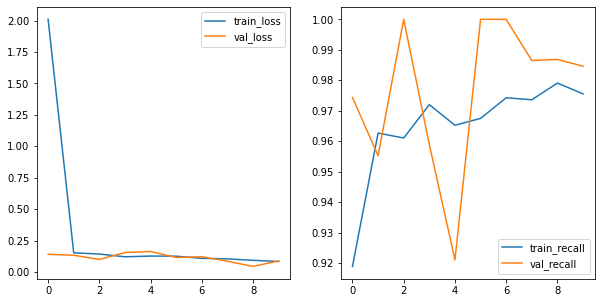

In [59]:
train_loss = history_5.history['loss']
train_recall = history_5.history['recall']
val_loss = history_5.history['val_loss']
val_recall = history_5.history['val_recall']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=history_5.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=history_5.epoch, y=train_recall, ax=ax2, label='train_recall')

sns.lineplot(x=history_5.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=history_5.epoch, y=val_recall, ax=ax2, label='val_recall');

In [ ]:
train_loss = history_5.history['loss']
train_recall = history_5.history['recall']
val_loss = history_5.history['val_loss']
val_recall = history_5.history['val_recall']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=history_5.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=history_5.epoch, y=train_recall, ax=ax2, label='train_recall')

sns.lineplot(x=history_5.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=history_5.epoch, y=val_recall, ax=ax2, label='val_recall');

### making function to graph loss and recall

In [39]:
def plot_history(history):
    train_loss = history.history['loss']
    train_recall = history.history['recall']
    val_loss = history.history['val_loss']
    val_recall = history.history['val_recall']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.lineplot(x=history.epoch, y=train_loss, ax=ax1, label='train_loss')
    sns.lineplot(x=history.epoch, y=train_recall, ax=ax2, label='train_recall')

    sns.lineplot(x=history.epoch, y=val_loss, ax=ax1, label='val_loss')
    sns.lineplot(x=history.epoch, y=val_recall, ax=ax2, label='val_recall')

    plt.show()

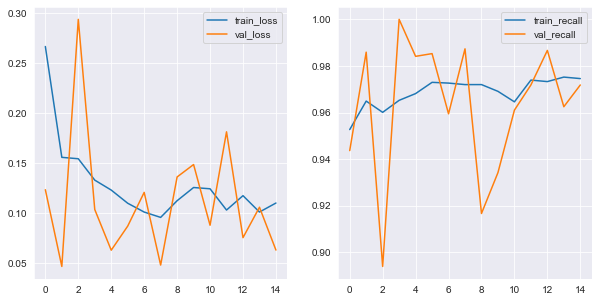

In [40]:
# graphing results5
plot_history(results5)

### evaluating with testing data

In [41]:
test_datagen = ImageDataGenerator()

test_gen = test_datagen.flow_from_directory(test_dir, target_size=(128,128), 
                                            batch_size=32, class_mode='binary', 
                                            color_mode='grayscale', shuffle=False)


Found 624 images belonging to 2 classes.


In [53]:
# Using the predict method of your trained model to generate predictions for the test set.

y_pred5 = model5.predict_classes(test_gen)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [54]:
y_pred5

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [57]:
# the way they tell us to do it but same as above
(model5.predict(test_gen) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [55]:
# Convert the predicted probabilities to predicted classes 
# by taking the index of the maximum value along the second axis (i.e., axis=1).

y_pred_5_classes = np.argmax(y_pred5, axis=1)
y_pred_5_classes

# returns all zeros... not multiclass...

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
# Get the true labels for the test set using the classes attribute of the test_generator.

y_true_5 = test_gen.classes
y_true_5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [64]:
# Use the confusion_matrix function from sklearn.metrics to calculate the confusion matrix.

from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_true_5, y_pred5)

In [65]:
# Print the confusion matrix
print(cm)

[[138  96]
 [  6 384]]


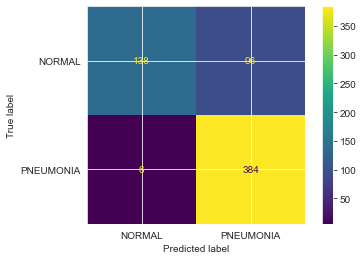

In [67]:
# use the ConfusionMatrixDisplay function to display confusion matrix graph

from sklearn.metrics import ConfusionMatrixDisplay
cm5_plot = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=list(train_gen5.class_indices.keys()))
cm5_plot.plot();

In [ ]:
predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [ ]:
# model 6

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2

# Define the model architecture
model = Sequential(name='Model_6')
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [27]:
# Train the model
history_6 = model.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=100//32)

Epoch 1/10
131/131 [==============================] - 176s 1s/step - loss: 14.7468 - recall: 0.9308 - val_loss: 8.4161 - val_recall: 1.0000
Epoch 2/10
131/131 [==============================] - 245s 2s/step - loss: 7.2808 - recall: 0.9211 - val_loss: 6.4260 - val_recall: 0.7949
Epoch 3/10
131/131 [==============================] - 229s 2s/step - loss: 5.5653 - recall: 0.9292 - val_loss: 5.0441 - val_recall: 0.8333
Epoch 4/10
131/131 [==============================] - 235s 2s/step - loss: 4.3995 - recall: 0.9382 - val_loss: 4.2680 - val_recall: 0.5753
Epoch 5/10
131/131 [==============================] - 167s 1s/step - loss: 3.5817 - recall: 0.9398 - val_loss: 3.4395 - val_recall: 0.7632
Epoch 6/10
131/131 [==============================] - 176s 1s/step - loss: 2.9197 - recall: 0.9495 - val_loss: 2.9498 - val_recall: 0.7561
Epoch 7/10
131/131 [==============================] - 172s 1s/step - loss: 2.4262 - recall: 0.9504 - val_loss: 2.3691 - val_recall: 0.8030
Epoch 8/10
131/131 [======

In [28]:
model.summary()

Model: "Model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       7385

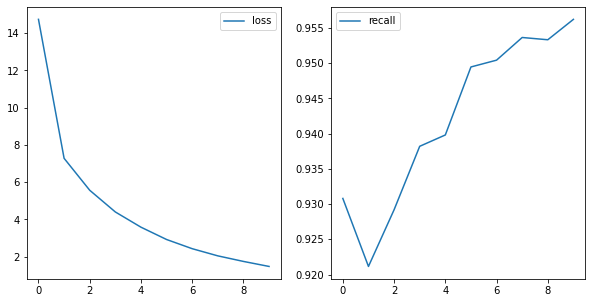

In [41]:
relu_loss = history_6.history['loss']
relu_recall = history_6.history['recall']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=history_6.epoch, y=relu_loss, ax=ax1, label='loss')
sns.lineplot(x=history_6.epoch, y=relu_recall, ax=ax2, label='recall');

In [71]:
train_loss = history_6.history['loss']
train_recall = history_6.history['recall']
val_loss = history_6.history['val_loss']
val_recall = history_6.history['val_recall']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=history_6.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=history_6.epoch, y=train_recall, ax=ax2, label='train_recall')

sns.lineplot(x=history_6.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=history_6.epoch, y=val_recall, ax=ax2, label='val_recall')

ax1.set_ylim([0, None])
ax2.set_ylim([0, None])
;

NameError: name 'history_6' is not defined

In [ ]:
# model 7

In [55]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

----
Found 4179 images belonging to 2 classes.
----
Found 1043 images belonging to 2 classes.


In [47]:
model7 = Sequential(name='Model7')

model7.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(256,256,1)))
model7.add(MaxPooling2D(pool_size=(2,2)))

model7.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))

model7.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))

model7.add(Conv2D(64, (3,3), activation='relu'))
model7.add(Flatten())

model7.add(LayerNormalization())
model7.add(Dropout(0.2))

model7.add(Dense(64, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

# Compile the model
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [49]:
# Train the model
history_7 = model7.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=100//32)

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [54]:
tf.keras.backend.clear_session()

In [56]:
# Define the model architecture
model7 = Sequential(name='Model7')
model7.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)))
model7.add(MaxPooling2D(pool_size=(2,2)))

model7.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))

model7.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))

model7.add(Conv2D(64, (3,3), activation='relu'))
model7.add(Flatten())

model7.add(LayerNormalization())
model7.add(Dropout(0.2))

model7.add(Dense(64, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

# Compile the model
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [57]:
# Train the model
history_7 = model7.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=100//32)

Epoch 1/10
131/131 [==============================] - 432s 3s/step - loss: 0.5158 - recall: 0.9411 - val_loss: 0.2541 - val_recall: 1.0000
Epoch 2/10
131/131 [==============================] - 359s 3s/step - loss: 0.2394 - recall: 0.9501 - val_loss: 0.1792 - val_recall: 0.9032
Epoch 3/10
131/131 [==============================] - 409s 3s/step - loss: 0.1843 - recall: 0.9556 - val_loss: 0.1709 - val_recall: 0.9531
Epoch 4/10
131/131 [==============================] - 345s 3s/step - loss: 0.1643 - recall: 0.9598 - val_loss: 0.1875 - val_recall: 0.9524
Epoch 5/10
131/131 [==============================] - 350s 3s/step - loss: 0.1580 - recall: 0.9611 - val_loss: 0.1026 - val_recall: 0.9857
Epoch 6/10
131/131 [==============================] - 347s 3s/step - loss: 0.1399 - recall: 0.9659 - val_loss: 0.0946 - val_recall: 0.9714
Epoch 7/10
131/131 [==============================] - 368s 3s/step - loss: 0.1195 - recall: 0.9704 - val_loss: 0.1441 - val_recall: 0.9375
Epoch 8/10
131/131 [=======

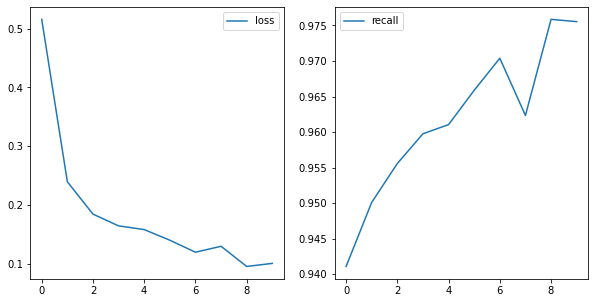

In [60]:
relu_loss = history_7.history['loss']
relu_recall = history_7.history['recall']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=history_7.epoch, y=relu_loss, ax=ax1, label='loss')
sns.lineplot(x=history_7.epoch, y=relu_recall, ax=ax2, label='recall');

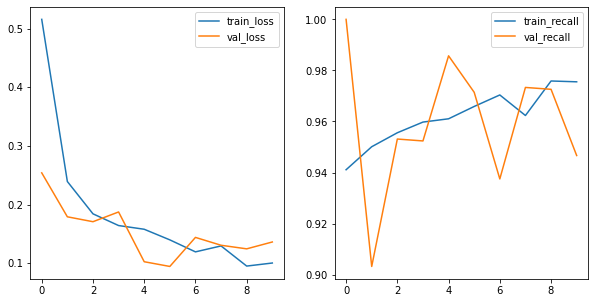

In [58]:
train_loss = history_7.history['loss']
train_recall = history_7.history['recall']
val_loss = history_7.history['val_loss']
val_recall = history_7.history['val_recall']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=history_7.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=history_7.epoch, y=train_recall, ax=ax2, label='train_recall')

sns.lineplot(x=history_7.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=history_7.epoch, y=val_recall, ax=ax2, label='val_recall');

In [ ]:
# model 8

In [65]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

----
Found 4179 images belonging to 2 classes.
----
Found 1043 images belonging to 2 classes.


In [66]:
# Define the model architecture
model8 = Sequential(name='Model_8')
model8.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model8.add(MaxPooling2D((2, 2)))

model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D((2, 2)))

model8.add(Conv2D(128, (3, 3), activation='relu'))
model8.add(MaxPooling2D((2, 2)))
model8.add(Flatten())

model8.add(Dense(64, activation='relu'))
model8.add(Dropout(0.2))

model8.add(Dense(32, activation='relu'))
model8.add(Dense(1, activation='sigmoid'))

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile the model
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [67]:
# Train the model
# Fit the model with early stopping
history_8 = model8.fit(train_generator, epochs=20, validation_data=val_generator, 
                       validation_steps=100//batch_size, callbacks=[early_stop])

Epoch 1/20
131/131 [==============================] - 289s 2s/step - loss: 0.9037 - recall: 0.9150 - val_loss: 0.1822 - val_recall: 0.9859
Epoch 2/20
131/131 [==============================] - 189s 1s/step - loss: 0.2000 - recall: 0.9537 - val_loss: 0.1858 - val_recall: 0.9028
Epoch 3/20
131/131 [==============================] - 140s 1s/step - loss: 0.1561 - recall: 0.9607 - val_loss: 0.1024 - val_recall: 0.9848
Epoch 4/20
131/131 [==============================] - 126s 960ms/step - loss: 0.1529 - recall: 0.9582 - val_loss: 0.1207 - val_recall: 0.9571
Epoch 5/20
131/131 [==============================] - 119s 908ms/step - loss: 0.1399 - recall: 0.9611 - val_loss: 0.0803 - val_recall: 0.9571
Epoch 6/20
131/131 [==============================] - 144s 1s/step - loss: 0.1193 - recall: 0.9691 - val_loss: 0.1209 - val_recall: 0.9857
Epoch 7/20
131/131 [==============================] - 115s 881ms/step - loss: 0.1163 - recall: 0.9723 - val_loss: 0.1584 - val_recall: 0.9545
Epoch 8/20
131/131

In [69]:
model8.summary()

Model: "Model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0   

In [68]:
train_loss = history_8.history['loss']
train_recall = history_8.history['recall']
val_loss = history_8.history['val_loss']
val_recall = history_8.history['val_recall']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=history_8.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=history_8.epoch, y=train_recall, ax=ax2, label='train_recall')

sns.lineplot(x=history_8.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=history_8.epoch, y=val_recall, ax=ax2, label='val_recall')

ax1.set_ylim([0, None])
ax2.set_ylim([0, None])
;

NameError: name 'history_8' is not defined

# Final model

In [51]:
def ImgGen(data_path, img_size=(128,128), batch_size=32, brightness=[0.8, 1.2], vsplit=0.2, rrange=10, seed=2023):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=vsplit, rotation_range=rrange, 
                                       fill_mode='nearest', brightness_range=brightness)
    train_gen = train_datagen.flow_from_directory(data_path, target_size=img_size, batch_size=batch_size, 
                                                  class_mode='binary', color_mode='grayscale', subset='training', 
                                                  shuffle=True, seed=seed)
    val_gen = train_datagen.flow_from_directory(data_path, target_size=img_size, batch_size=batch_size, 
                                                class_mode='binary', color_mode='grayscale', subset='validation', 
                                                shuffle=True, seed=seed)
    return train_gen, val_gen

In [52]:
train_gen9, val_gen9 = ImgGen(train_dir)

Found 4179 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
model1 = Sequential(name='Model1')

# input_shape must match what's provided to the image generator
model1.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1))) 
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])

## Multiclass 
bacterial, viral, normal

### Kevin found a paper with code

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LayerNormalization, \
                                    BatchNormalization, Activation, MaxPool2D, AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
#x is output of previous layer
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet34(shape = (128, 128, 1), classes = 3):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    # Step 2 (Initial Conv layer along with maxPool)
    x = Conv2D(128, kernel_size=(3,3), strides=2, padding='same')(x_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 128
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = AveragePooling2D((2,2), padding = 'same')(x)
    x = Flatten()(x)
    x = Dense(512, activation = 'relu')(x)
    x = Dense(classes, activation = 'softmax')(x)
    model = Model(inputs = x_input, outputs = x, name = "Model2")
    return model

In [ ]:
img_size = (128, 128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

print('----')
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='categorical', color_mode='grayscale', 
                                                    subset='training', shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                  class_mode='categorical', color_mode='grayscale', 
                                                  subset='validation', shuffle=True, seed=seed)

print('----')
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size,
                                                  class_mode='categorical', color_mode='grayscale')

In [ ]:
model8 = ResNet34()

In [ ]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])

In [ ]:
model8.fit(train_generator, epochs=20, workers=2, validation_data=val_generator, validation_steps=100//batch_size)

### Trying to do it on my own

In [ ]:
# what I did before
# Setting the paths to the train and validation directories

parent_dir =  os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')
test_dir = os.path.join(parent_dir, 'Data/test')

In [ ]:
pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

In [72]:
pneumonia_filenames

['BACTERIA-4038442-0001.jpeg',
 'BACTERIA-8034950-0011.jpeg',
 'BACTERIA-292199-0002.jpeg',
 'BACTERIA-2092977-0003.jpeg',
 'BACTERIA-4407438-0002.jpeg',
 'BACTERIA-8093423-0001.jpeg',
 'BACTERIA-880930-0002.jpeg',
 'VIRUS-3443773-0006.jpeg',
 'BACTERIA-9072988-0002.jpeg',
 'VIRUS-9674936-0007.jpeg',
 'VIRUS-1387612-0002.jpeg',
 'BACTERIA-778527-0001.jpeg',
 'BACTERIA-7564600-0004.jpeg',
 'BACTERIA-1982399-0002.jpeg',
 'BACTERIA-3246536-0004.jpeg',
 'BACTERIA-4991468-0003.jpeg',
 'BACTERIA-8188709-0003.jpeg',
 'BACTERIA-112674-0001.jpeg',
 'BACTERIA-3044214-0001.jpeg',
 'VIRUS-6897628-0002.jpeg',
 'VIRUS-385176-0010.jpeg',
 'BACTERIA-4679582-0001.jpeg',
 'BACTERIA-6162615-0002.jpeg',
 'BACTERIA-1199786-0002.jpeg',
 'BACTERIA-5150733-0007.jpeg',
 'BACTERIA-516591-0002.jpeg',
 'BACTERIA-3582443-0002.jpeg',
 'VIRUS-149498-0002.jpeg',
 'BACTERIA-2792838-0006.jpeg',
 'BACTERIA-6944416-0001.jpeg',
 'BACTERIA-4521338-0003.jpeg',
 'BACTERIA-5401887-0003.jpeg',
 'BACTERIA-1790048-0002.jpeg',
 '

In [23]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

## Now making new labels

In [20]:
# Training Data

parent_dir_2 = os.path.dirname(os.getcwd())
train_dir_2 = os.path.join(parent_dir, 'Data/train')
test_dir_2 = os.path.join(parent_dir, 'Data/test')

# Get the file names in the pneumonia folder
pneumonia_filenames_2 = os.listdir(os.path.join(train_dir_2, 'pneumonia'))

# Create file paths for all images in the train directory
train_filepaths_2 = []
train_labels_2 = []
for filename in pneumonia_filenames_2:
    if 'BACTERIA' in filename:
        label = 'bacterial'
    elif 'VIRUS' in filename:
        label = 'viral'
    else:
        continue  # skip this file if it's not labeled
    filepath = os.path.join(train_dir_2, 'pneumonia', filename)
    train_filepaths_2.append(filepath)
    train_labels_2.append(label)

# Get the file names in the normal folder
normal_filenames_2 = os.listdir(os.path.join(train_dir_2, 'normal'))

# Create file paths for all images in the train directory
for filename in normal_filenames_2:
    label = 'normal'
    filepath = os.path.join(train_dir_2, 'normal', filename)
    train_filepaths_2.append(filepath)
    train_labels_2.append(label)

In [21]:
import random
# Shuffle the file paths and labels
train_data_2 = list(zip(train_filepaths_2, train_labels_2))
random.shuffle(train_data_2)
train_filepaths_2, train_labels_2 = zip(*train_data_2)

### testing data

In [ ]:
# Get the file names in the pneumonia folder
pneumonia_filenames_test_2 = os.listdir(os.path.join(test_dir_2, 'pneumonia'))

# Create file paths for all images in the test directory
test_filepaths_2 = []
test_labels_2 = []
for filename in pneumonia_filenames_test_2:
    if 'BACTERIA' in filename:
        label = 'bacterial'
    elif 'VIRUS' in filename:
        label = 'viral'
    else:
        continue  # skip this file if it's not labeled
    filepath = os.path.join(test_dir_2, 'pneumonia', filename)
    test_filepaths_2.append(filepath)
    test_labels_2.append(label)

# Get the file names in the normal folder
normal_filenames_2 = os.listdir(os.path.join(test_dir_2, 'normal'))

# Create file paths for all images in the test directory
for filename in normal_filenames_2:
    label = 'normal'
    filepath = os.path.join(test_dir_2, 'normal', filename)
    test_filepaths_2.append(filepath)
    test_labels_2.append(label)

# Shuffle the file paths and labels
test_data = list(zip(test_filepaths, test_labels))
random.shuffle(test_data)
test_filepaths, test_labels = zip(*test_data)


In [71]:
# making different paths for multiclass

parent_dir = os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')

pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia', 'bacterial')
                                ) + os.listdir(os.path.join(train_dir, 'pneumonia', 'viral'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alisonpark/Documents/Flatiron/xrayid/Data/train/pneumonia/bacterial'

In [ ]:
filepaths = []
labels = []

for filename in pneumonia_filenames:
    filepaths.append(os.path.join(train_dir, 'pneumonia', filename))
    if 'virus' in filename:
        labels.append('viral')
    else:
        labels.append('bacterial')

for filename in normal_filenames:
    filepaths.append(os.path.join(train_dir, 'normal', filename))
    labels.append('normal')